<a href="https://colab.research.google.com/github/megmkoch/IceJamProjectFall2022/blob/main/iceJamStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!pip install libpysal
!pip install rasterio
!pip install earthpy
!pip install rioxarray
!pip install rasterstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 17.2 MB/s 
     |████████████████████████████████| 16.6 MB 51.0 MB/s 
     |████████████████████████████████| 7.8 MB 8.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 7.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 28.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
   

In [2]:
import numpy as np
import numpy.ma as ma
import geopandas as gpd
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.plot as ep
import os
import rioxarray as rxr

In [4]:
#stream stage values from usgs gages
lock8_0207 = [-1.5500000000000007]
freemans_0207 = [-1.3536213000000021]
rexford_0207 = [-1.870000000000001]
vischer_0207 = [-0.15000000000000036]
lock8_0219 = [-6.049999999999999]
freemans_0219 = [-4.442801999999999]
rexford_0219 = [-3.8599999999999994]
vischer_0219 = [-1.6300000000000008]
#convert stream gage measurements from ft to m
lock8_0207_m = lock8_0207[0]*0.3048
freemans_0207_m = freemans_0207[0]*0.3048
rexford_0207_m = rexford_0207[0]*0.3048
vischer_0207_m = vischer_0207[0]*0.3048
lock8_0219_m = lock8_0219[0]*0.3048
freemans_0219_m = freemans_0219[0]*0.3048
rexford_0219_m = rexford_0219[0]*0.3048
vischer_0219_m = vischer_0219[0]*0.3048
#define variables
start_date_s = ["2019-01-26", "2019-02-07"]
end_date_s = ["2019-02-07", "2019-02-19"]
lock8_stage = [lock8_0207_m, lock8_0219_m]
rexford_stage = [rexford_0207_m, rexford_0219_m]
freemans_stage = [freemans_0207_m, freemans_0219_m]
vischer_stage = [vischer_0207_m, vischer_0219_m]

In [6]:
streamgages_vertdisp = pd.DataFrame({'start_date':start_date_s, 'end_date':end_date_s, 'lock8_stage':lock8_stage, 'freemans_stage':freemans_stage, 'rexford_stage': rexford_stage, 'vischer_stage':vischer_stage})
print(streamgages_vertdisp)

   start_date    end_date  lock8_stage  freemans_stage  rexford_stage  \
0  2019-01-26  2019-02-07     -0.47244       -0.412584      -0.569976   
1  2019-02-07  2019-02-19     -1.84404       -1.354166      -1.176528   

   vischer_stage  
0      -0.045720  
1      -0.496824  


In [7]:
streamgages_0207 = [-0.47244, -0.412584, -0.569976, -0.045720]
streamgages_0219 = [-1.84404, -1.354166, -1.176528, -0.496824]

In [9]:
#vertical displacement values from sentinel-1 images (m)
#make lists of vertical displacements (mean from zonal stats function) from 02.07.2019
lock8_0207vd = [0.21210715606922412]
rexford_0207vd = [0.43293891319861777]
freemans_0207vd = [0.30677935103295556]
vischer_0207vd = [0.255656182349145]
#make lists of vertical displacements (mean from zonal stats function) from 02.19.2019
lock8_0219vd = [-0.016676143835519106]
rexford_0219vd = [-0.01232003432053786]
freemans_0219vd = [-0.01663324362795118]
vischer_0219vd = [-0.01631996514913919]
#define variables
start_date = ["2019-01-26", "2019-02-07"]
end_date = ["2019-02-07", "2019-02-19"]
lock8_vertdisp = [lock8_0207vd, lock8_0219vd]
rexford_vertdisp = [rexford_0207vd, rexford_0219vd]
freemans_vertdisp = [freemans_0207vd, freemans_0219vd]
vischer_vertdisp = [vischer_0207vd, vischer_0219vd]

In [10]:
sentinel_vertdisp = pd.DataFrame({'start_date':start_date, 'end_date':end_date, 'lock8_vertdisp':lock8_vertdisp, 'freemans_vertdisp':freemans_vertdisp, 'rexford_vertdisp':rexford_vertdisp, 'vischer_vertdisp':vischer_vertdisp})
print(sentinel_vertdisp)

   start_date    end_date           lock8_vertdisp       freemans_vertdisp  \
0  2019-01-26  2019-02-07    [0.21210715606922412]   [0.30677935103295556]   
1  2019-02-07  2019-02-19  [-0.016676143835519106]  [-0.01663324362795118]   

         rexford_vertdisp        vischer_vertdisp  
0   [0.43293891319861777]     [0.255656182349145]  
1  [-0.01232003432053786]  [-0.01631996514913919]  


In [11]:
sentinel_0207 = [0.21210715606922412,  0.30677935103295556, 0.43293891319861777, 0.255656182349145]
sentinel_0219 = [-0.016676143835519106,  -0.01663324362795118, -0.01232003432053786, -0.01631996514913919]

In [12]:
sentinel_total = [0.21210715606922412,  0.30677935103295556, 0.43293891319861777, 0.255656182349145, -0.016676143835519106,  -0.01663324362795118, -0.01232003432053786, -0.01631996514913919]
streamgages_total = [-0.47244, -0.412584, -0.569976, -0.045720, -1.84404, -1.354166, -1.176528, -0.496824]
starting = ['2019-01-26', '2019-01-26', '2019-01-26', '2019-01-26', '2019-02-07', '2019-02-07', '2019-02-07', '2019-02-07']
ending = ['2019-02-07', '2019-02-07', '2019-02-07', '2019-02-07', '2019-02-19', '2019-02-19', '2019-02-19', '2019-02-19']

In [30]:
gage_id = ['lock8', 'freemans', 'rexford', 'vischer', 'lock8_1', 'freemans_1', 'rexford_1', 'vischer_1']

In [13]:
alldata_df = pd.DataFrame({'sentinel_feb07':sentinel_0207, 'sentinel_feb19': sentinel_0219, 'streamgages_feb07': streamgages_0207, 'streamgages_feb19': streamgages_0219})

In [31]:
total_df = pd.DataFrame({'gage_id':gage_id, 'starting_date': starting, 'ending_date': ending, 'streamgages_total':streamgages_total, 'sentinel_total':sentinel_total})
print(total_df)

      gage_id starting_date ending_date  streamgages_total  sentinel_total
0       lock8    2019-01-26  2019-02-07          -0.472440        0.212107
1    freemans    2019-01-26  2019-02-07          -0.412584        0.306779
2     rexford    2019-01-26  2019-02-07          -0.569976        0.432939
3     vischer    2019-01-26  2019-02-07          -0.045720        0.255656
4     lock8_1    2019-02-07  2019-02-19          -1.844040       -0.016676
5  freemans_1    2019-02-07  2019-02-19          -1.354166       -0.016633
6   rexford_1    2019-02-07  2019-02-19          -1.176528       -0.012320
7   vischer_1    2019-02-07  2019-02-19          -0.496824       -0.016320


[Text(0, 0.5, 'Sentinel-1 calculated vertical displacement (m)'),
 Text(0.5, 0, 'USGS gage vertical displacement (m)'),
 Text(0.5, 1.0, 'USGS gage vs. Sentinel-1 vertical displacement')]

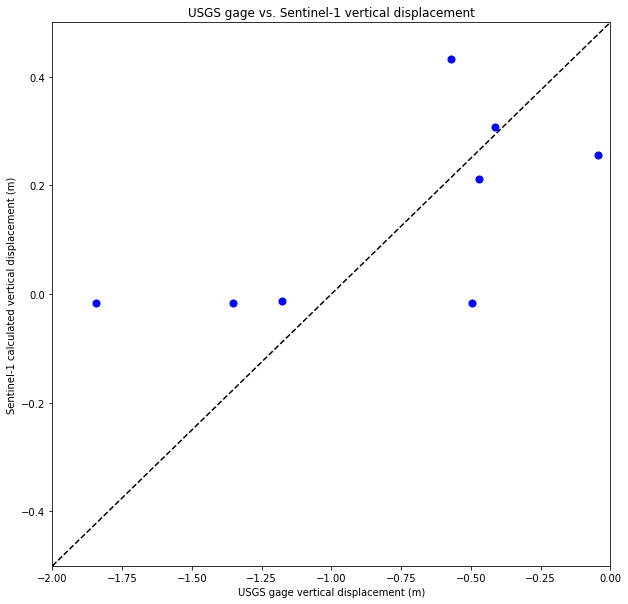

In [18]:
# Plot scatter plot
fig, ax = plt.subplots(figsize=(10, 10))

#csfont = {'fontname':'Myriad Pro'}
total_df.plot('streamgages_total', 'sentinel_total',  
                          kind='scatter', color="blue",
                          s=50, ax=ax)

# Add a diagonal line
ax.set(xlim=[-2, 0], ylim=[-0.5, 0.5], label="Data")
ax.plot((0, 1), (0, 1), transform=ax.transAxes, ls='--',
        c='k', label="1:1 line")

ax.set(xlabel="USGS gage vertical displacement (m)",
       ylabel="Sentinel-1 calculated vertical displacement (m)", title="USGS gage vs. Sentinel-1 vertical displacement")

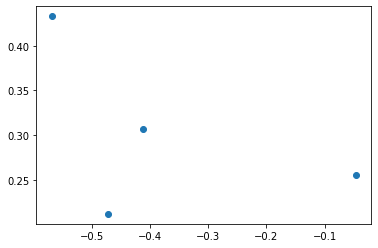

In [16]:

plt.scatter(streamgages_0207, sentinel_0207)
ax.set(xlabel="USGS gage vertical displacement (m)",
       ylabel="Sentinel-1 calculated vertical displacement (m)", title="USGS gage vs. Sentinel-1 vertical displacement")
plt.show()

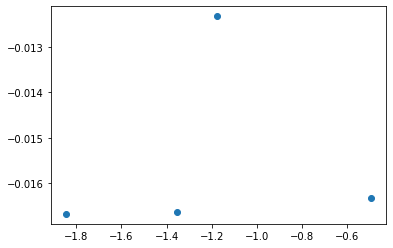

In [17]:
plt.scatter(streamgages_0219, sentinel_0219)
plt.show()

In [19]:
from scipy import stats
#Note: some of you may get an error from this import function. What do you do about it?

x = total_df.streamgages_total
y = total_df.sentinel_total

In [20]:
#Task 7:
print("Variable x is of type " + str(type(x)) + " and variable y is of type" + str(type(y)))

Variable x is of type <class 'pandas.core.series.Series'> and variable y is of type<class 'pandas.core.series.Series'>


In [21]:
# Train a linear regression model using stats.linregress
slope, intercept, r_value, _, _ = stats.linregress(x, y)

print("slope:", slope,
      "\nintercept:", intercept,
      "\nr squared:", r_value**2)

slope: 0.20044289109139246 
intercept: 0.30285125510935895 
r squared: 0.44066767487522135


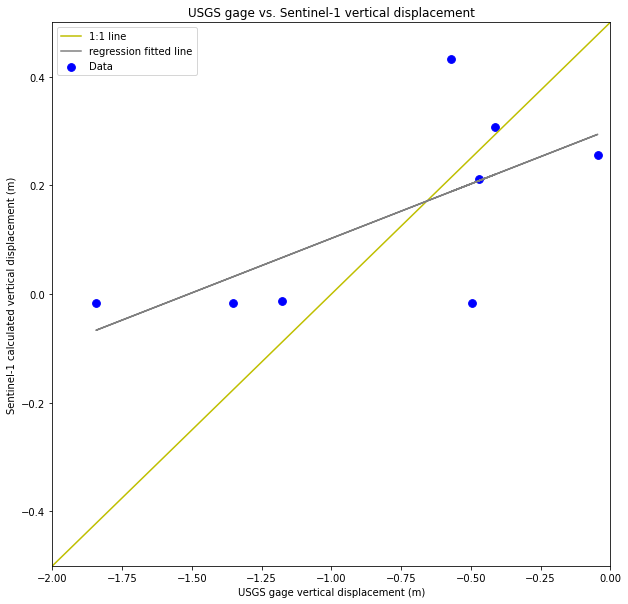

In [23]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 10))

m = slope.astype(float)

total_df.plot('streamgages_total', 'sentinel_total',
                          kind='scatter', color="blue",
                          s=60, ax=ax, label="Data")

# Add a diagonal line
ax.set(xlim=[-2, 0], ylim=[-0.5, 0.5])
ax.plot((0, 1), (0, 1), 'y-', transform=ax.transAxes, label="1:1 line")
ax.plot(x, m*x + intercept, 'grey', label='regression fitted line')

ax.set(xlabel="USGS gage vertical displacement (m)",
       ylabel="Sentinel-1 calculated vertical displacement (m)", title="USGS gage vs. Sentinel-1 vertical displacement")
plt.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Sentinel-1 calculated vertical displacement (m)'),
 Text(0.5, 0, 'USGS gage vertical displacement (m)'),
 Text(0.5, 1.0, 'USGS gage vs. Sentinel-1 vertical displacement')]

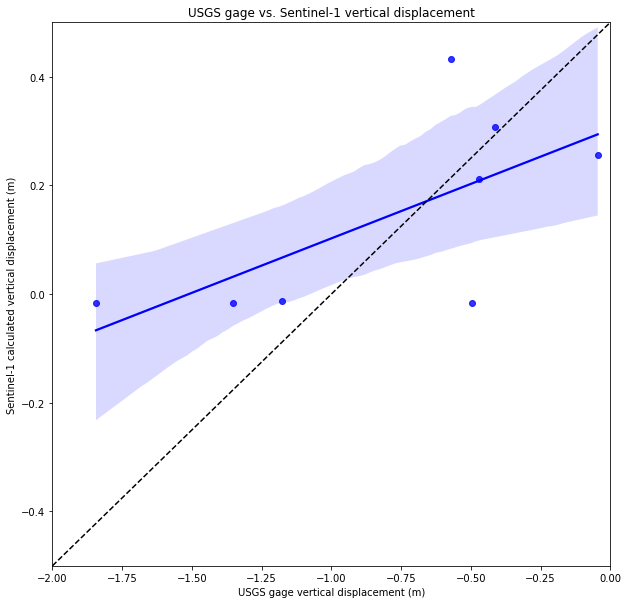

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.regplot('streamgages_total', 'sentinel_total', data=total_df,
                 color="blue")

# Add a diagonal line
ax.set(xlim=[-2, 0], ylim=[-0.5, 0.5])
ax.plot((0, 1), (0, 1), transform=ax.transAxes, ls='--', c='k')

ax.set(xlabel="USGS gage vertical displacement (m)",
       ylabel="Sentinel-1 calculated vertical displacement (m)", title="USGS gage vs. Sentinel-1 vertical displacement")

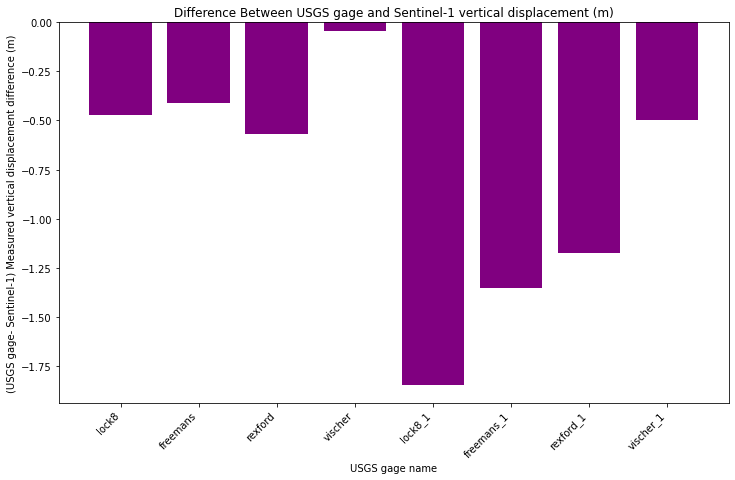

In [38]:
# Calculate difference and add the plot id to each xaxis label
total_df["streamht_diff"] = total_df["streamgages_total"] - \
    total_df["sentinel_total"]

fig, ax = plt.subplots(figsize=(12, 7))

ax.bar(total_df['gage_id'], total_df['streamgages_total'],
       color="purple")

ax.set(xlabel='USGS gage name', ylabel='(USGS gage- Sentinel-1) Measured vertical displacement difference (m)',
       title='Difference Between USGS gage and Sentinel-1 vertical displacement (m)')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [39]:
print(total_df)

      gage_id starting_date ending_date  streamgages_total  sentinel_total  \
0       lock8    2019-01-26  2019-02-07          -0.472440        0.212107   
1    freemans    2019-01-26  2019-02-07          -0.412584        0.306779   
2     rexford    2019-01-26  2019-02-07          -0.569976        0.432939   
3     vischer    2019-01-26  2019-02-07          -0.045720        0.255656   
4     lock8_1    2019-02-07  2019-02-19          -1.844040       -0.016676   
5  freemans_1    2019-02-07  2019-02-19          -1.354166       -0.016633   
6   rexford_1    2019-02-07  2019-02-19          -1.176528       -0.012320   
7   vischer_1    2019-02-07  2019-02-19          -0.496824       -0.016320   

   streamht_diff  
0      -0.684547  
1      -0.719363  
2      -1.002915  
3      -0.301376  
4      -1.827364  
5      -1.337533  
6      -1.164208  
7      -0.480504  


In [47]:
#import necessary libraries 
import statsmodels.api as sm
from statsmodels.formula.api import ols

#fit simple linear regression model
model = ols('sentinel_total ~ streamgages_total', data=total_df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         sentinel_total   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     4.727
Date:                Wed, 14 Dec 2022   Prob (F-statistic):             0.0726
Time:                        19:22:26   Log-Likelihood:                 5.1892
No. Observations:                   8   AIC:                            -6.378
Df Residuals:                       6   BIC:                            -6.220
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3029      0.09

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


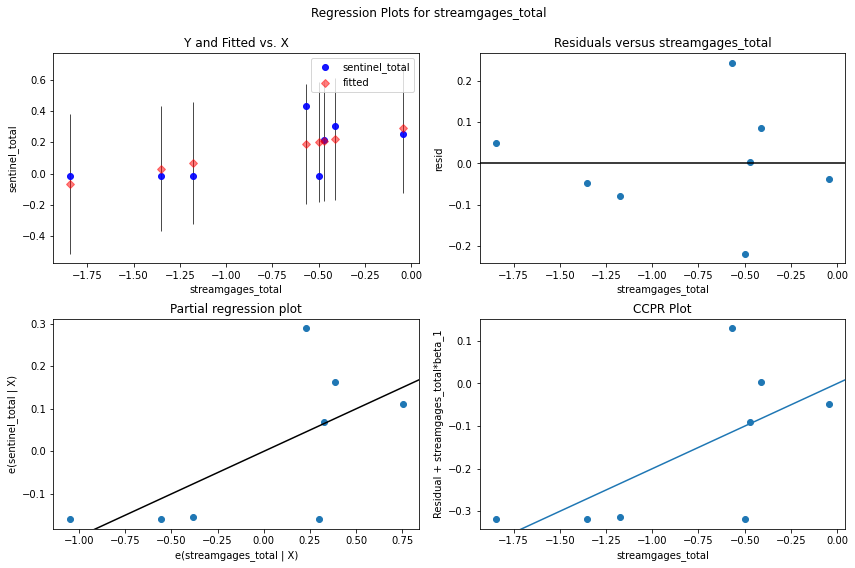

In [36]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'streamgages_total', fig=fig)

In [40]:
total_df['vd_residuals']=ols('sentinel_total ~ streamgages_total', data=total_df).fit().resid

In [41]:
print(total_df)

      gage_id starting_date ending_date  streamgages_total  sentinel_total  \
0       lock8    2019-01-26  2019-02-07          -0.472440        0.212107   
1    freemans    2019-01-26  2019-02-07          -0.412584        0.306779   
2     rexford    2019-01-26  2019-02-07          -0.569976        0.432939   
3     vischer    2019-01-26  2019-02-07          -0.045720        0.255656   
4     lock8_1    2019-02-07  2019-02-19          -1.844040       -0.016676   
5  freemans_1    2019-02-07  2019-02-19          -1.354166       -0.016633   
6   rexford_1    2019-02-07  2019-02-19          -1.176528       -0.012320   
7   vischer_1    2019-02-07  2019-02-19          -0.496824       -0.016320   

   streamht_diff  vd_residuals  
0      -0.684547      0.003953  
1      -0.719363      0.086628  
2      -1.002915      0.244335  
3      -0.301376     -0.038031  
4      -1.827364      0.050097  
5      -1.337533     -0.048052  
6      -1.164208     -0.079345  
7      -0.480504     -0.219586  


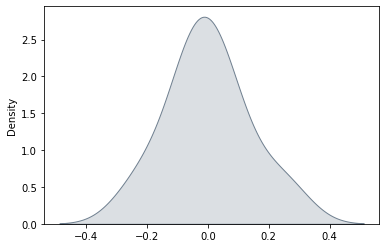

In [42]:
sns.kdeplot(total_df['vd_residuals'].values, shade=True, color='slategrey')